# Does the variety of product offerings have an impact on alternative payment methods?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import plotly.express as px

pd.set_option('display.max_columns', None)

%matplotlib inline 


C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/cleaned_market_df.csv')
drop_cols = ['street', 'city', 'County', 'zip', 'x', 'y']
df.drop(columns=drop_cols, axis=1, inplace=True)
df.head()

,MarketName,State,Credit,WIC,WICcash,SFMNP,SNAP,has_website,Has Market,Produce,Confectionary,Household,Dairy,Plants,Meat,Other,product_count,alt_pay_methods
0,Caledonia Farmers Market Association - Danville,Vermont,1,1,0,1,0,1,1,5.0,4.0,3.0,2.0,2.0,2.0,2.0,20.0,2
1,Stearns Homestead Farmers' Market,Ohio,1,0,0,1,0,1,1,3.0,4.0,2.0,1.0,1.0,1.0,0.0,12.0,1
2,10th Steet Community Farmers Market,Missouri,1,0,0,0,0,0,1,3.0,3.0,2.0,1.0,1.0,2.0,1.0,13.0,0
3,112st Madison Avenue,New York,0,0,1,1,0,0,1,3.0,3.0,2.0,0.0,1.0,0.0,1.0,10.0,2
4,12 South Farmers Market,Tennessee,1,0,0,0,1,1,1,4.0,5.0,2.0,2.0,1.0,2.0,2.0,18.0,1


In [3]:
print('shape')
print(df.shape)
print('-' *40)
df.describe()

shape
(5864, 18)
----------------------------------------


,Credit,WIC,WICcash,SFMNP,SNAP,has_website,Has Market,Produce,Confectionary,Household,Dairy,Plants,Meat,Other,product_count,alt_pay_methods
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.0,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.00000
mean,0.811050,0.453956,0.226808,0.467087,0.493179,0.718793,1.0,3.550819,3.105218,1.511767,1.289563,1.667633,1.274045,1.157742,13.556787,1.64103
std,0.391502,0.497918,0.418803,0.498958,0.499996,0.449627,0.0,1.629553,1.257017,0.990419,0.804677,1.068777,1.117260,0.971106,5.694645,1.40692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,14.000000,1.00000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,18.000000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,8.000000,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000,28.000000,4.00000


In [4]:
df['alt_pay_methods'].value_counts()

0    1753
1    1242
3    1179
2     958
4     732
Name: alt_pay_methods, dtype: int64

In [5]:
product_df = df.loc[df['product_count'] >= 10.0]
product_df.head()

,MarketName,State,Credit,WIC,WICcash,SFMNP,SNAP,has_website,Has Market,Produce,Confectionary,Household,Dairy,Plants,Meat,Other,product_count,alt_pay_methods
0,Caledonia Farmers Market Association - Danville,Vermont,1,1,0,1,0,1,1,5.0,4.0,3.0,2.0,2.0,2.0,2.0,20.0,2
1,Stearns Homestead Farmers' Market,Ohio,1,0,0,1,0,1,1,3.0,4.0,2.0,1.0,1.0,1.0,0.0,12.0,1
2,10th Steet Community Farmers Market,Missouri,1,0,0,0,0,0,1,3.0,3.0,2.0,1.0,1.0,2.0,1.0,13.0,0
3,112st Madison Avenue,New York,0,0,1,1,0,0,1,3.0,3.0,2.0,0.0,1.0,0.0,1.0,10.0,2
4,12 South Farmers Market,Tennessee,1,0,0,0,1,1,1,4.0,5.0,2.0,2.0,1.0,2.0,2.0,18.0,1


# Visualization

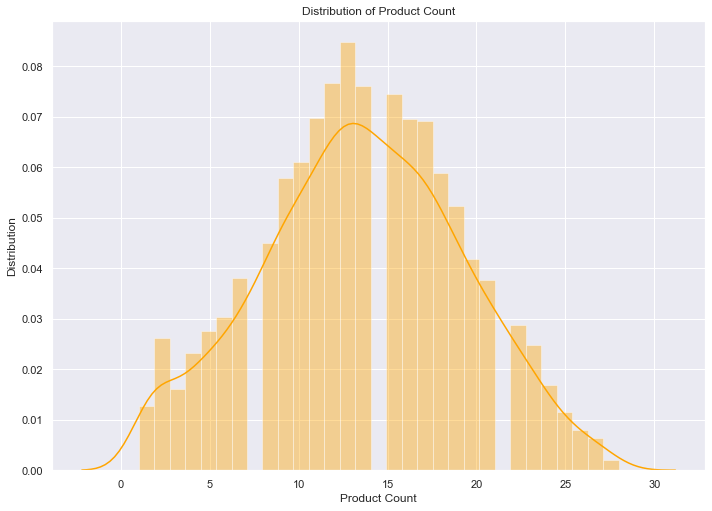

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = df['product_count']

sns.set_color_codes()
ax = sns.distplot(x, color="orange")
plt.title('Distribution of Product Count')
plt.ylabel('Distribution')
plt.xlabel('Product Count')
plt.show()

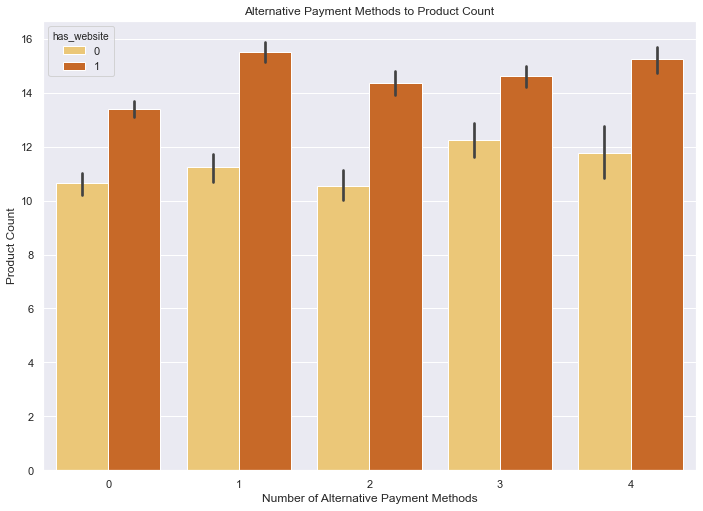

In [7]:

ax = sns.barplot(x="alt_pay_methods", y="product_count", hue="has_website", data=df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count')
plt.ylabel('Product Count')
plt.xlabel('Number of Alternative Payment Methods')
#plt.legend(labels=['Has Website'])
plt.show()

##### Seems that Markets with websites tend to have more variety; but that the amount of accepted payments doesn't have a high impact

In [8]:
df.columns

Index(['MarketName', 'State', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP',
       'has_website', 'Has Market', 'Produce', 'Confectionary', 'Household',
       'Dairy', 'Plants', 'Meat', 'Other', 'product_count', 'alt_pay_methods'],
      dtype='object')

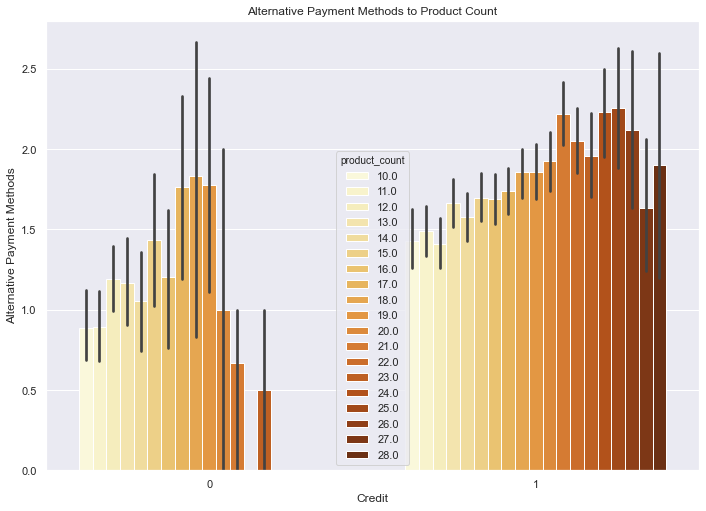

In [9]:
ax = sns.barplot(x="Credit", y="alt_pay_methods", hue="product_count", data=product_df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count')
plt.ylabel('Alternative Payment Methods')
plt.xlabel('Credit')
plt.show()

In [10]:
credit_df = product_df.loc[product_df['Credit'] == 1]
non_credit_df = product_df.loc[product_df['Credit'] == 0]

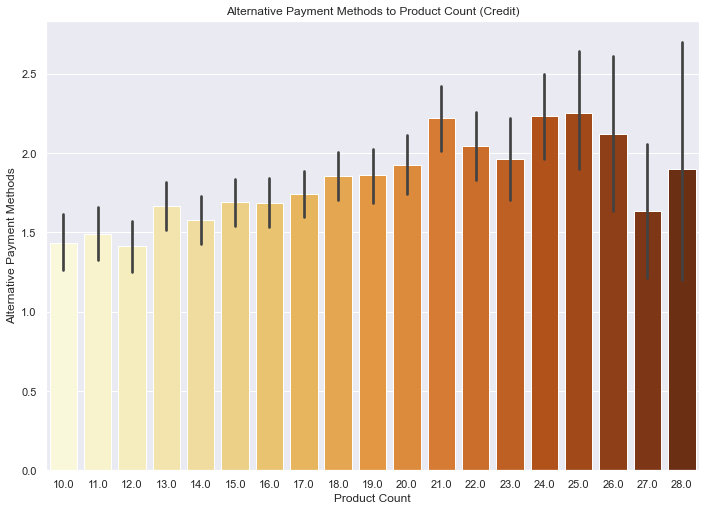

In [11]:
ax = sns.barplot(x="product_count", y="alt_pay_methods", data=credit_df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count (Credit)')
plt.ylabel('Alternative Payment Methods')
plt.xlabel('Product Count')
plt.show()

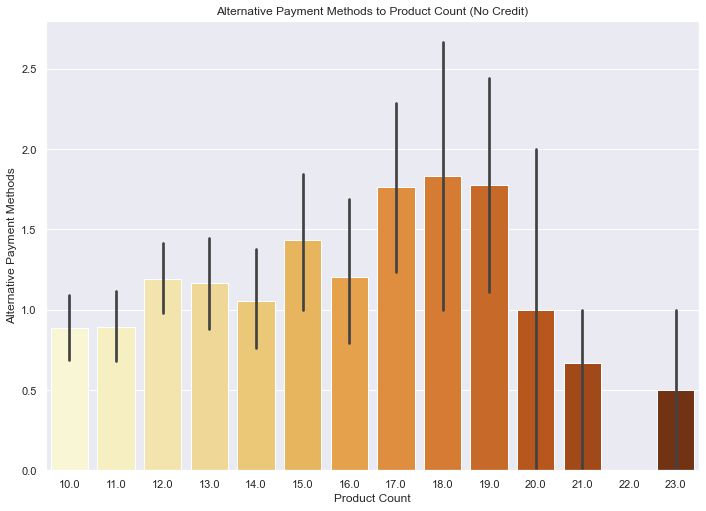

In [12]:
ax = sns.barplot(x="product_count", y="alt_pay_methods", data=non_credit_df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count (No Credit)')
plt.ylabel('Alternative Payment Methods')
plt.xlabel('Product Count')
plt.show()

##### The three charts above visualizations seem to indicate that if a market takes credit and has a higher variety of products available- that they tend to be more likely to accept alternative payment methods

# Individual Product Categories

In [13]:
col_list = ['Produce', 'Confectionary', 'Household', 'Dairy', 'Plants', 'Meat', 'Other']

In [14]:
def draw_lineplot(dfName, colList, y_var=None):
    for colName in colList:
        ax = sns.lineplot(x=dfName[colName], y=y_var, hue="has_website", 
                          style='has_website', palette="YlOrRd", data=dfName)
        plt.title(f'Alternative Payment Methods by {colName} Availibility')
        plt.ylabel('Alternative Payment Methods')
        plt.xlabel(f'{colName} Availibility')
        plt.show()

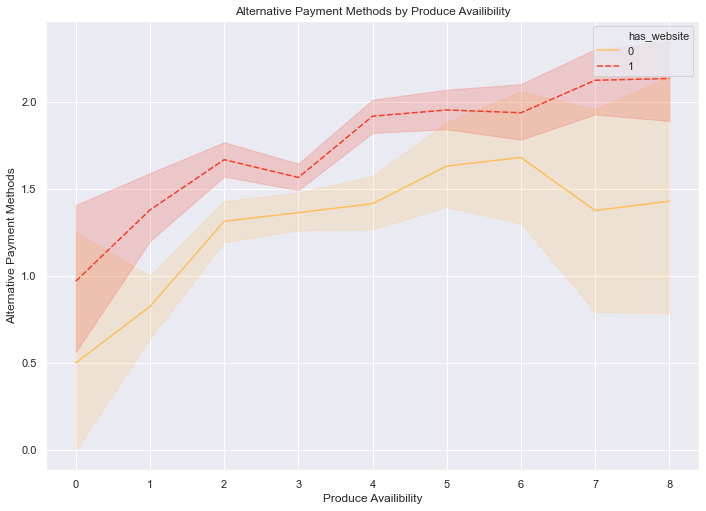

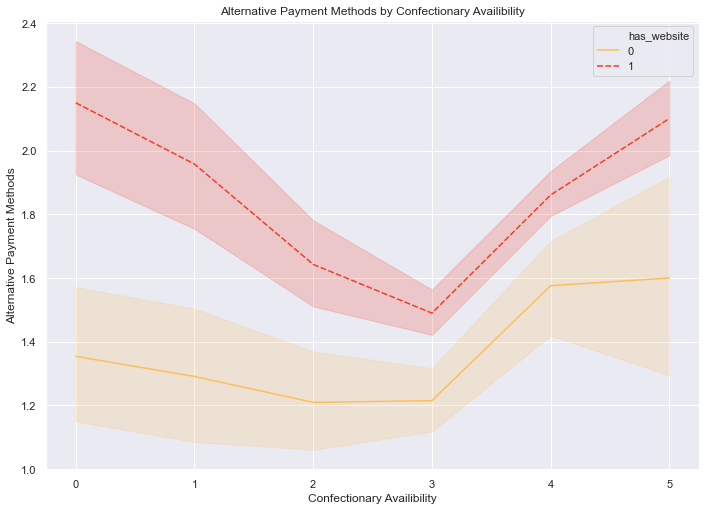

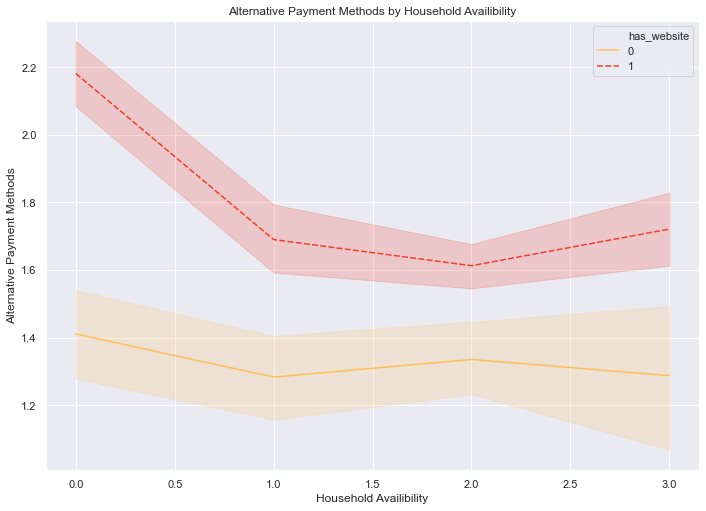

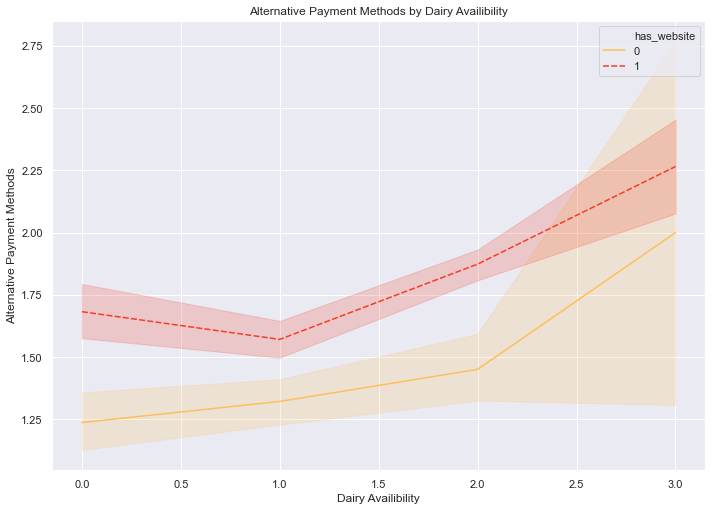

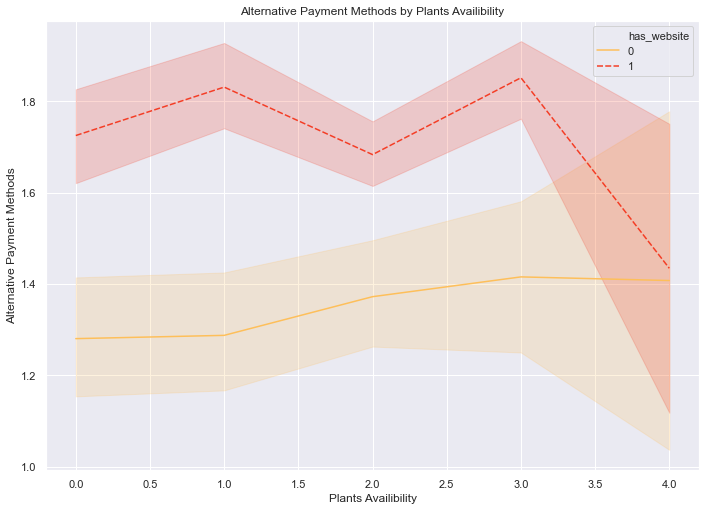

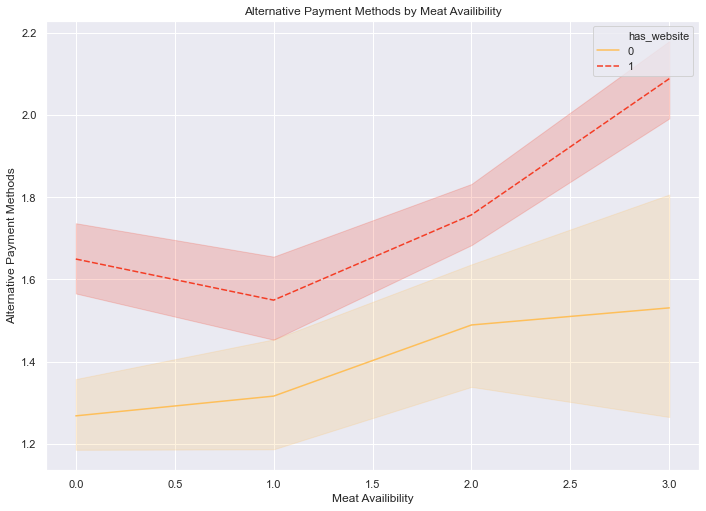

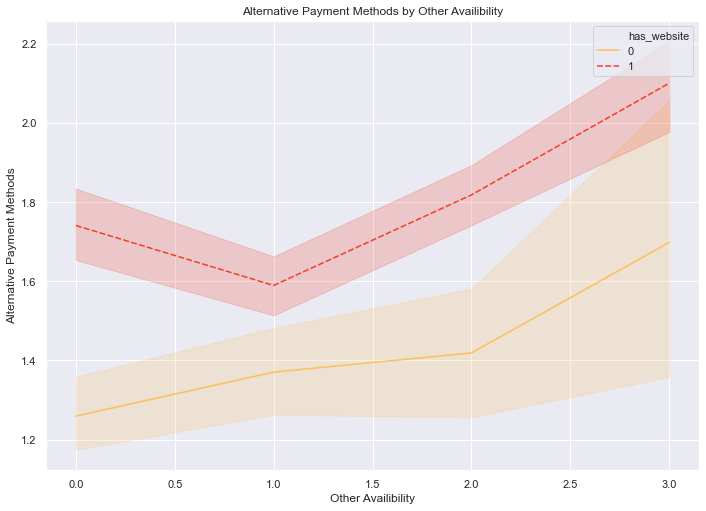

In [15]:
draw_lineplot(df, col_list, y_var='alt_pay_methods')

##### All of the visuals so far seem to indicate that an larger variety of products does lend to a higher liklihood of a market accepting alternative payment forms.

- I'm going to graph by individual payment methods

In [16]:
col_list2 = ['Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP']

In [17]:
def draw_lineplot2(dfName, colList, h_var=None):
    for colName in colList:
        ax = sns.lineplot(x=dfName['product_count'], y=dfName['alt_pay_methods'], hue=dfName[colName],
                          style=dfName[colName], palette="YlOrRd", data=dfName)
        plt.title(f'Product Variety by {colName} Acceptance')
        plt.ylabel('Alternative Payment Methods')
        plt.xlabel('Product Count')
        plt.show()

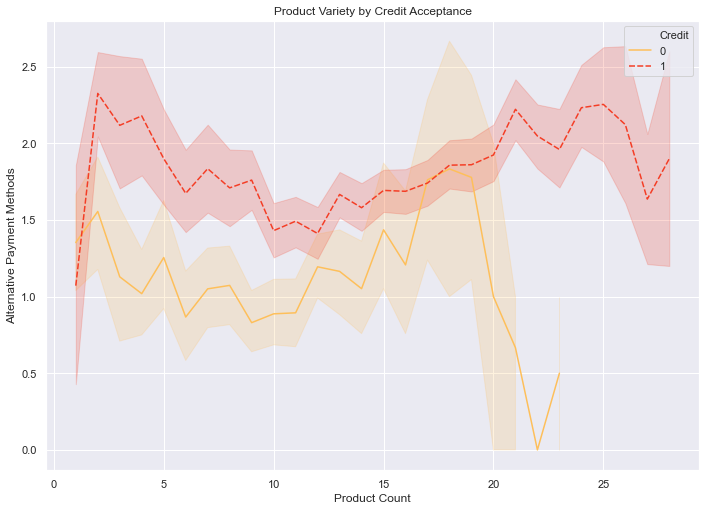

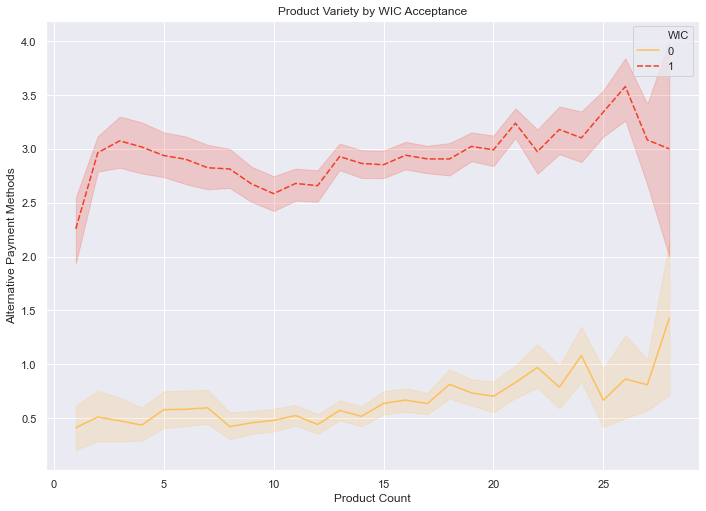

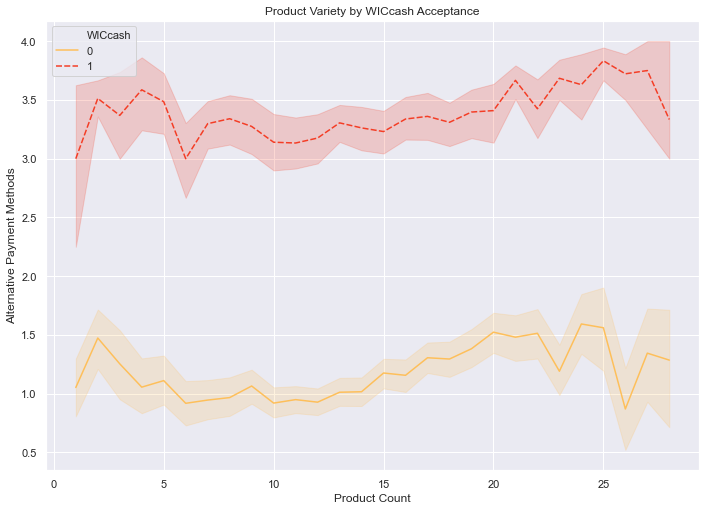

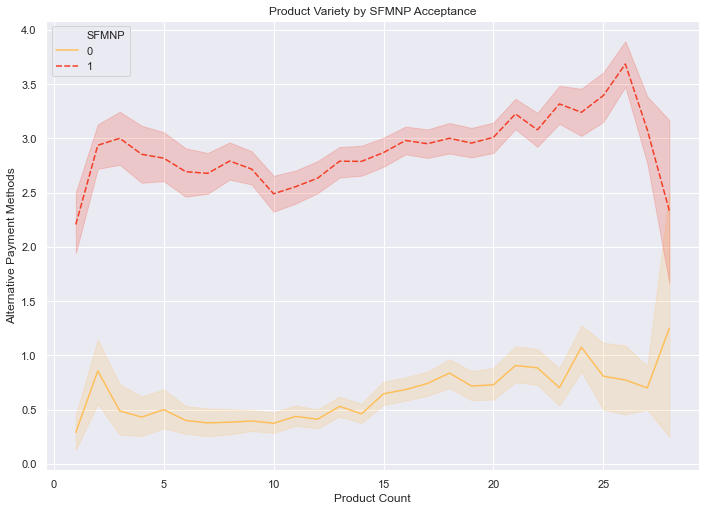

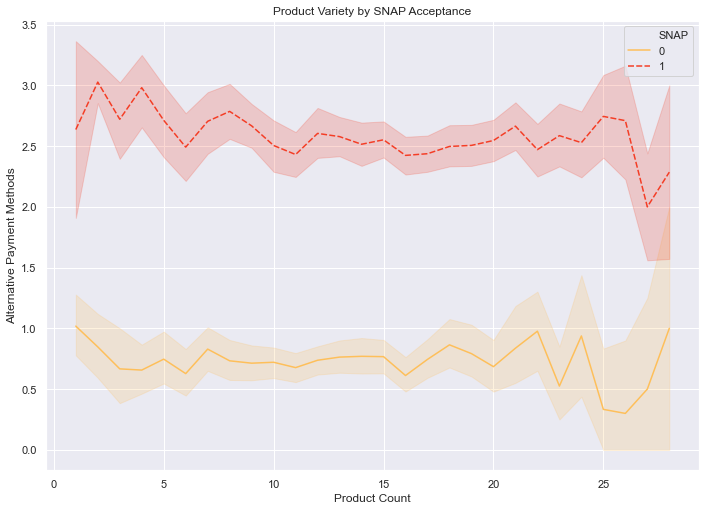

In [18]:
draw_lineplot2(df, col_list2)

# Conclusion

A market with a larger variety of products has an overwhelming tendency to accept alternative payment methods